In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, lfilter

In [2]:
def Hilbert_transformation(eeg_signal, sr=250, ylim=False):
    # 힐버트 변환을 적용하여 해석적 신호를 얻음
    analytic_signal = hilbert(eeg_signal)
    
    # 밴드패스 필터링을 위한 함수 정의
    # 밴드패스 필터링: 내가 설정한 주파수 영역에 해당하는 값만 통과시키고 나머지는 차단
    # 모든 파형(delta, theta, alpha, beta, gamma)를 같은 길이로 만들기 위해서 사용
    def bandpass_filter(data, lowcut, highcut, sr, order=5):
        nyquist = 0.5 * sr
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
        y = lfilter(b, a, data)
        return y
    
    
    # 주파수 구간 설정
    band_freqs = [
        (4, 8),      # theta
        (8.5, 13),   # alpha
        (13.5, 30),  # beta
        (30.5, 50),  # gamma
    ]
    
    bands = ['theta', 'alpha', 'beta', 'gamma']
    
    
    # 각 대역별 신호를 저장할 리스트 초기화
    filtered_signals = []
    
    # 각 대역별로 필터링을 수행하고 결과를 저장
    for lowcut, highcut in band_freqs:
        filtered_signal = bandpass_filter(analytic_signal, lowcut, highcut, sr, order=4)
        filtered_signals.append(filtered_signal)
    
    # 시간 축 생성
    t = np.arange(len(eeg_signal)) / sr
    
    # 각 대역별 파형 시각화
    plt.figure(figsize=(15, 10))
    
    for i, filtered_signal in enumerate(filtered_signals):
        plt.subplot(len(filtered_signals), 1, i + 1)
        plt.plot(t, np.abs(filtered_signal), label=f'{bands[i]}')
        if ylim:
            plt.ylim(ylim)
        plt.ylabel('Amplitude')
        plt.legend(loc='upper right')
        plt.title(bands[i])
    
    plt.xlabel('Time [s]')
    plt.tight_layout()
    plt.show()

    return filtered_signals

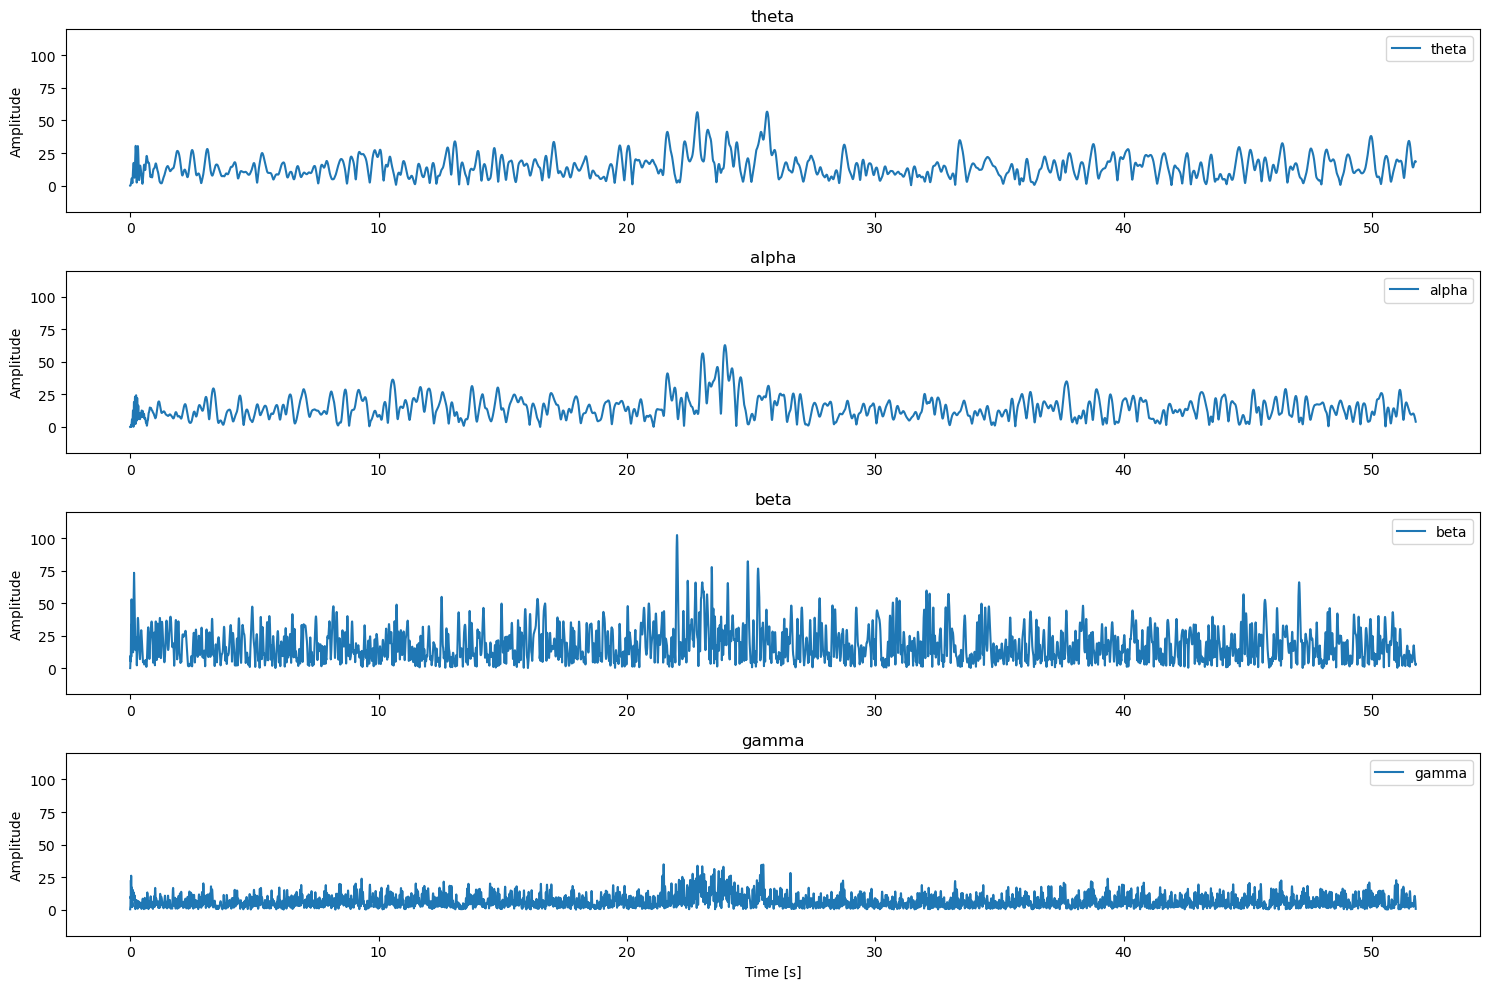

In [6]:
# 파일을 열고 데이터를 읽음
file_path = 'EEG_data.json'
with open(file_path, 'r') as file:
    json_data = json.load(file)

eeg_signal = json_data['EEG']

filtered_signals = Hilbert_transformation(eeg_signal, 250, [-20, 120])